In [1]:
import matplotlib.pyplot as plot
from dense import *
import pandas as pd
# from ilp import ilp
from sample import *
import os
from time import time
from copy import deepcopy

# Read files with fixed ordered

In [2]:
plt_root_path='data/Data/000/Trajectory/'
threshold=10000
df=pd.read_csv('data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
point_set=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
point_set_size=point_set.shape[0]

for file in os.listdir(plt_root_path)[1:]:
    # print(file)
    df=pd.read_csv(plt_root_path+file,sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)
    df_points=np.array(df.loc[:,['Longitude','Latitude']].values.tolist())
    point_set=np.concatenate((point_set,df_points))
    point_set_size+=df_points.shape[0]
    if point_set_size>threshold:
        break
print("The number of files read: {}".format(len(point_set)))
    

The number of files read: 14788


## Set up operator for getting proximity

In [3]:
prox=proximity(point_set,set_eps=False)
prox.epsilon

3.797682913998397e-07

# 2000 files

## Bound Axis in plots

Sort the copy of arrays to avoid manipulating the original one

In [5]:
x=point_set[:2000,0]
y=point_set[:2000,1]
x_cpy=deepcopy(x)
x_cpy.sort()
x_cpy[0],x_cpy[-1]

(116.285446, 116.32901499999998)

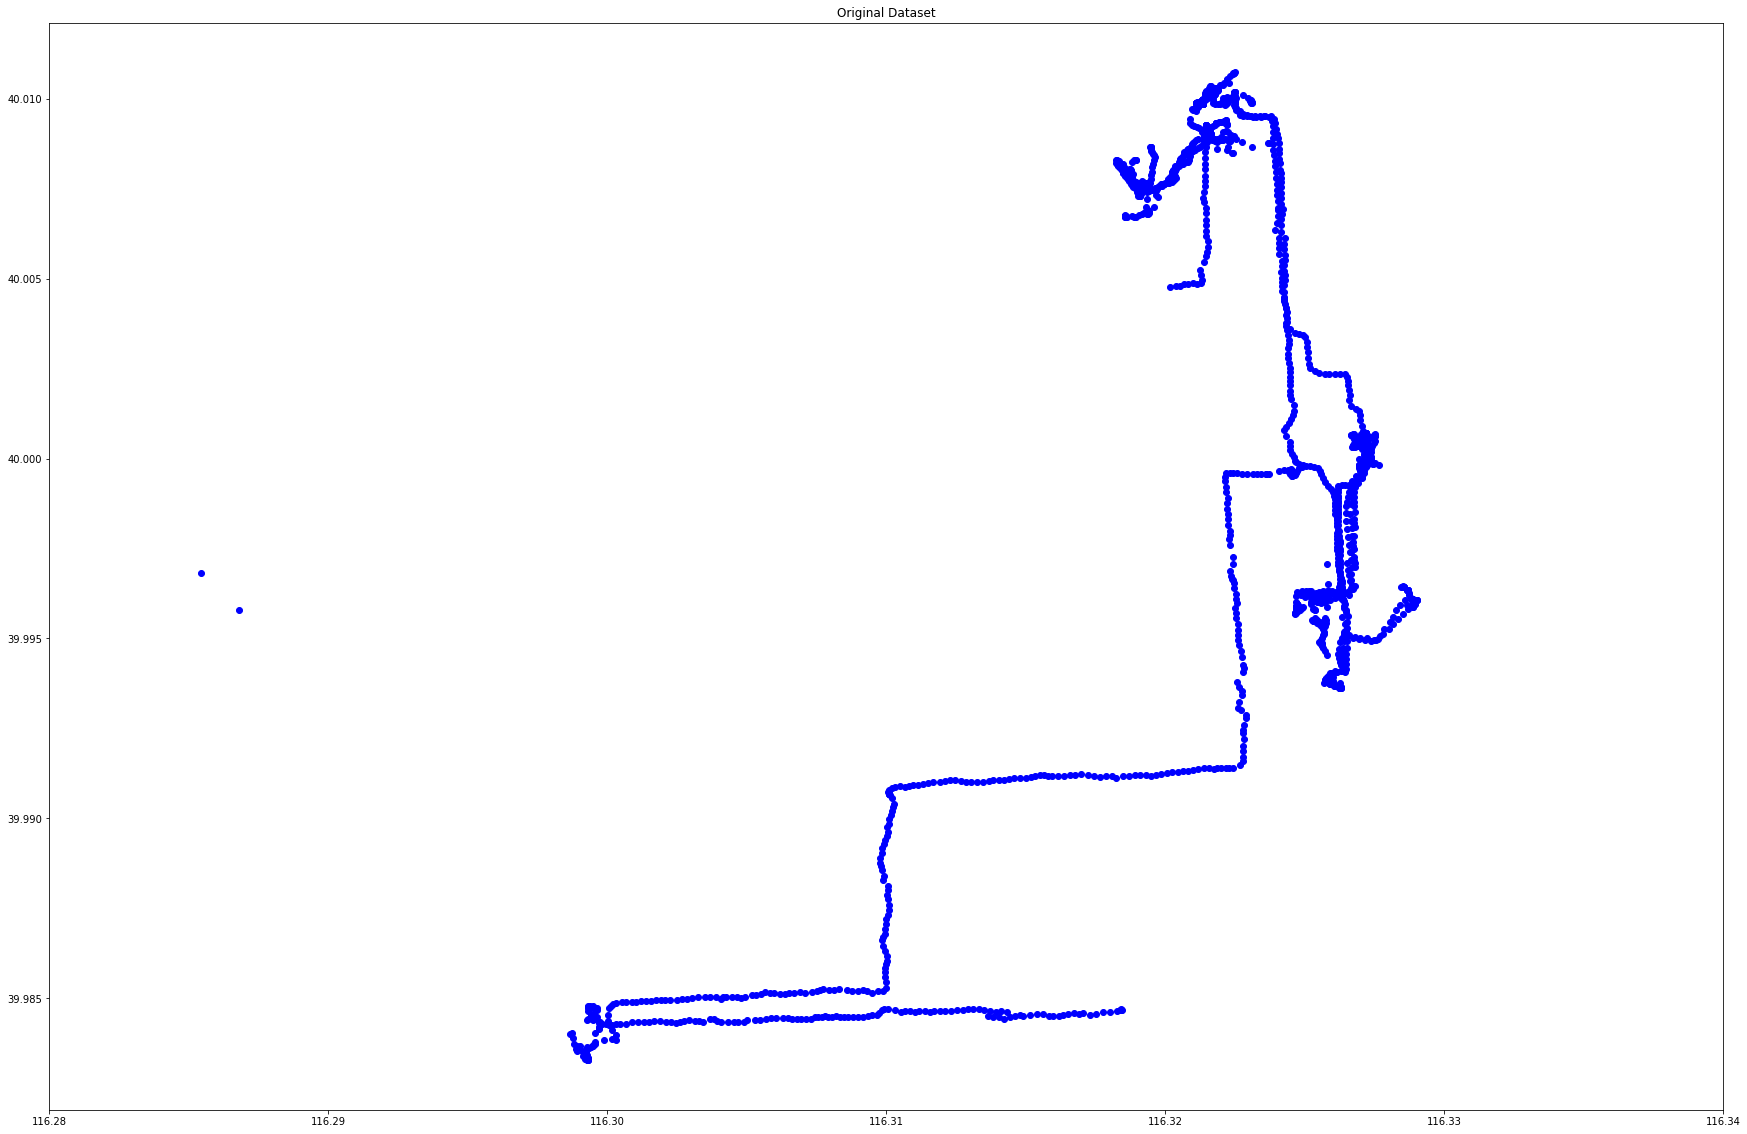

In [6]:
# x=point_set[:2000,0]
# y=point_set[:2000,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(x,y,c='b')
plot.title('Original Dataset')
plot.show()

In [7]:
sample_size=100

running time:  4.958698034286499
objective values:  10.7


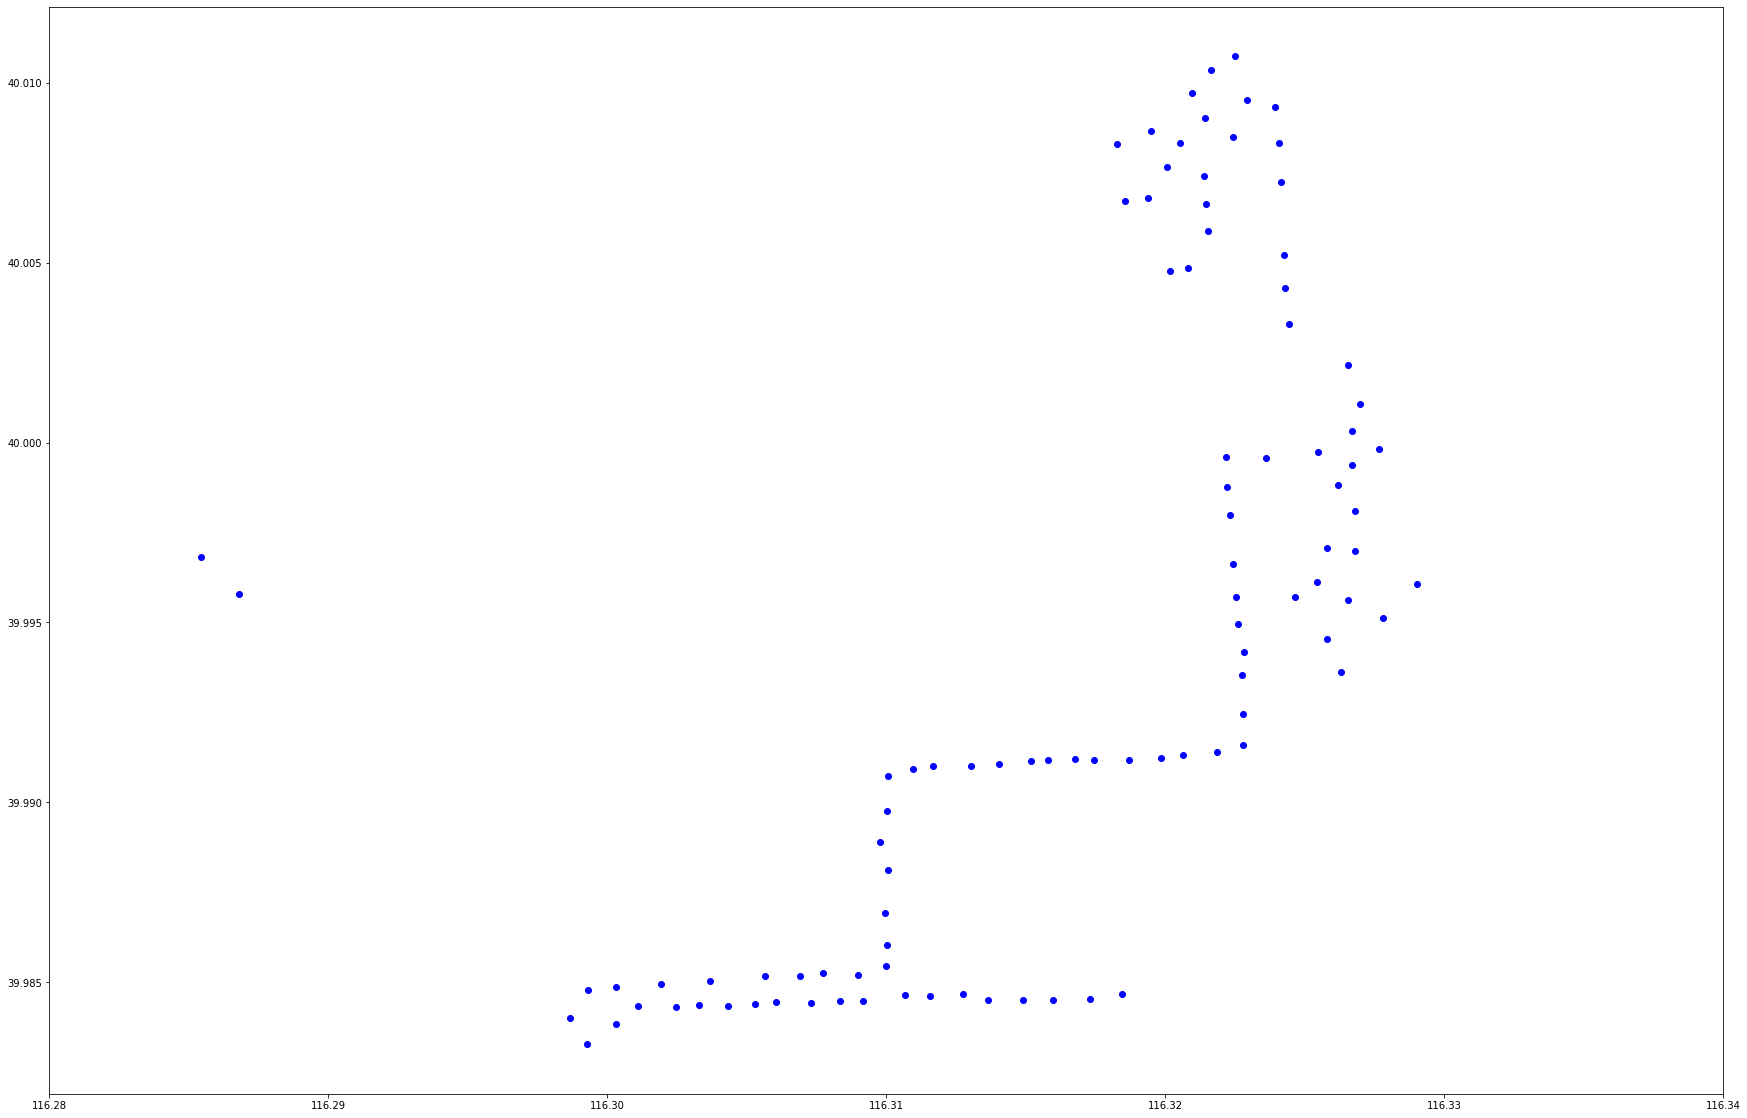

In [8]:
int_generator=interchange(prox)
start=time()
int_samples=int_generator.run(point_set[:2000],sample_size)
print('running time: ',time()-start)
print('objective values: ',get_obj(int_samples,prox))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.figure(figsize=(30,20))
plot.xlim(116.28,116.34)
plot.scatter(int_x,int_y,c='b')
plot.show()

running time:  0.007601499557495117
objective value:  171.73


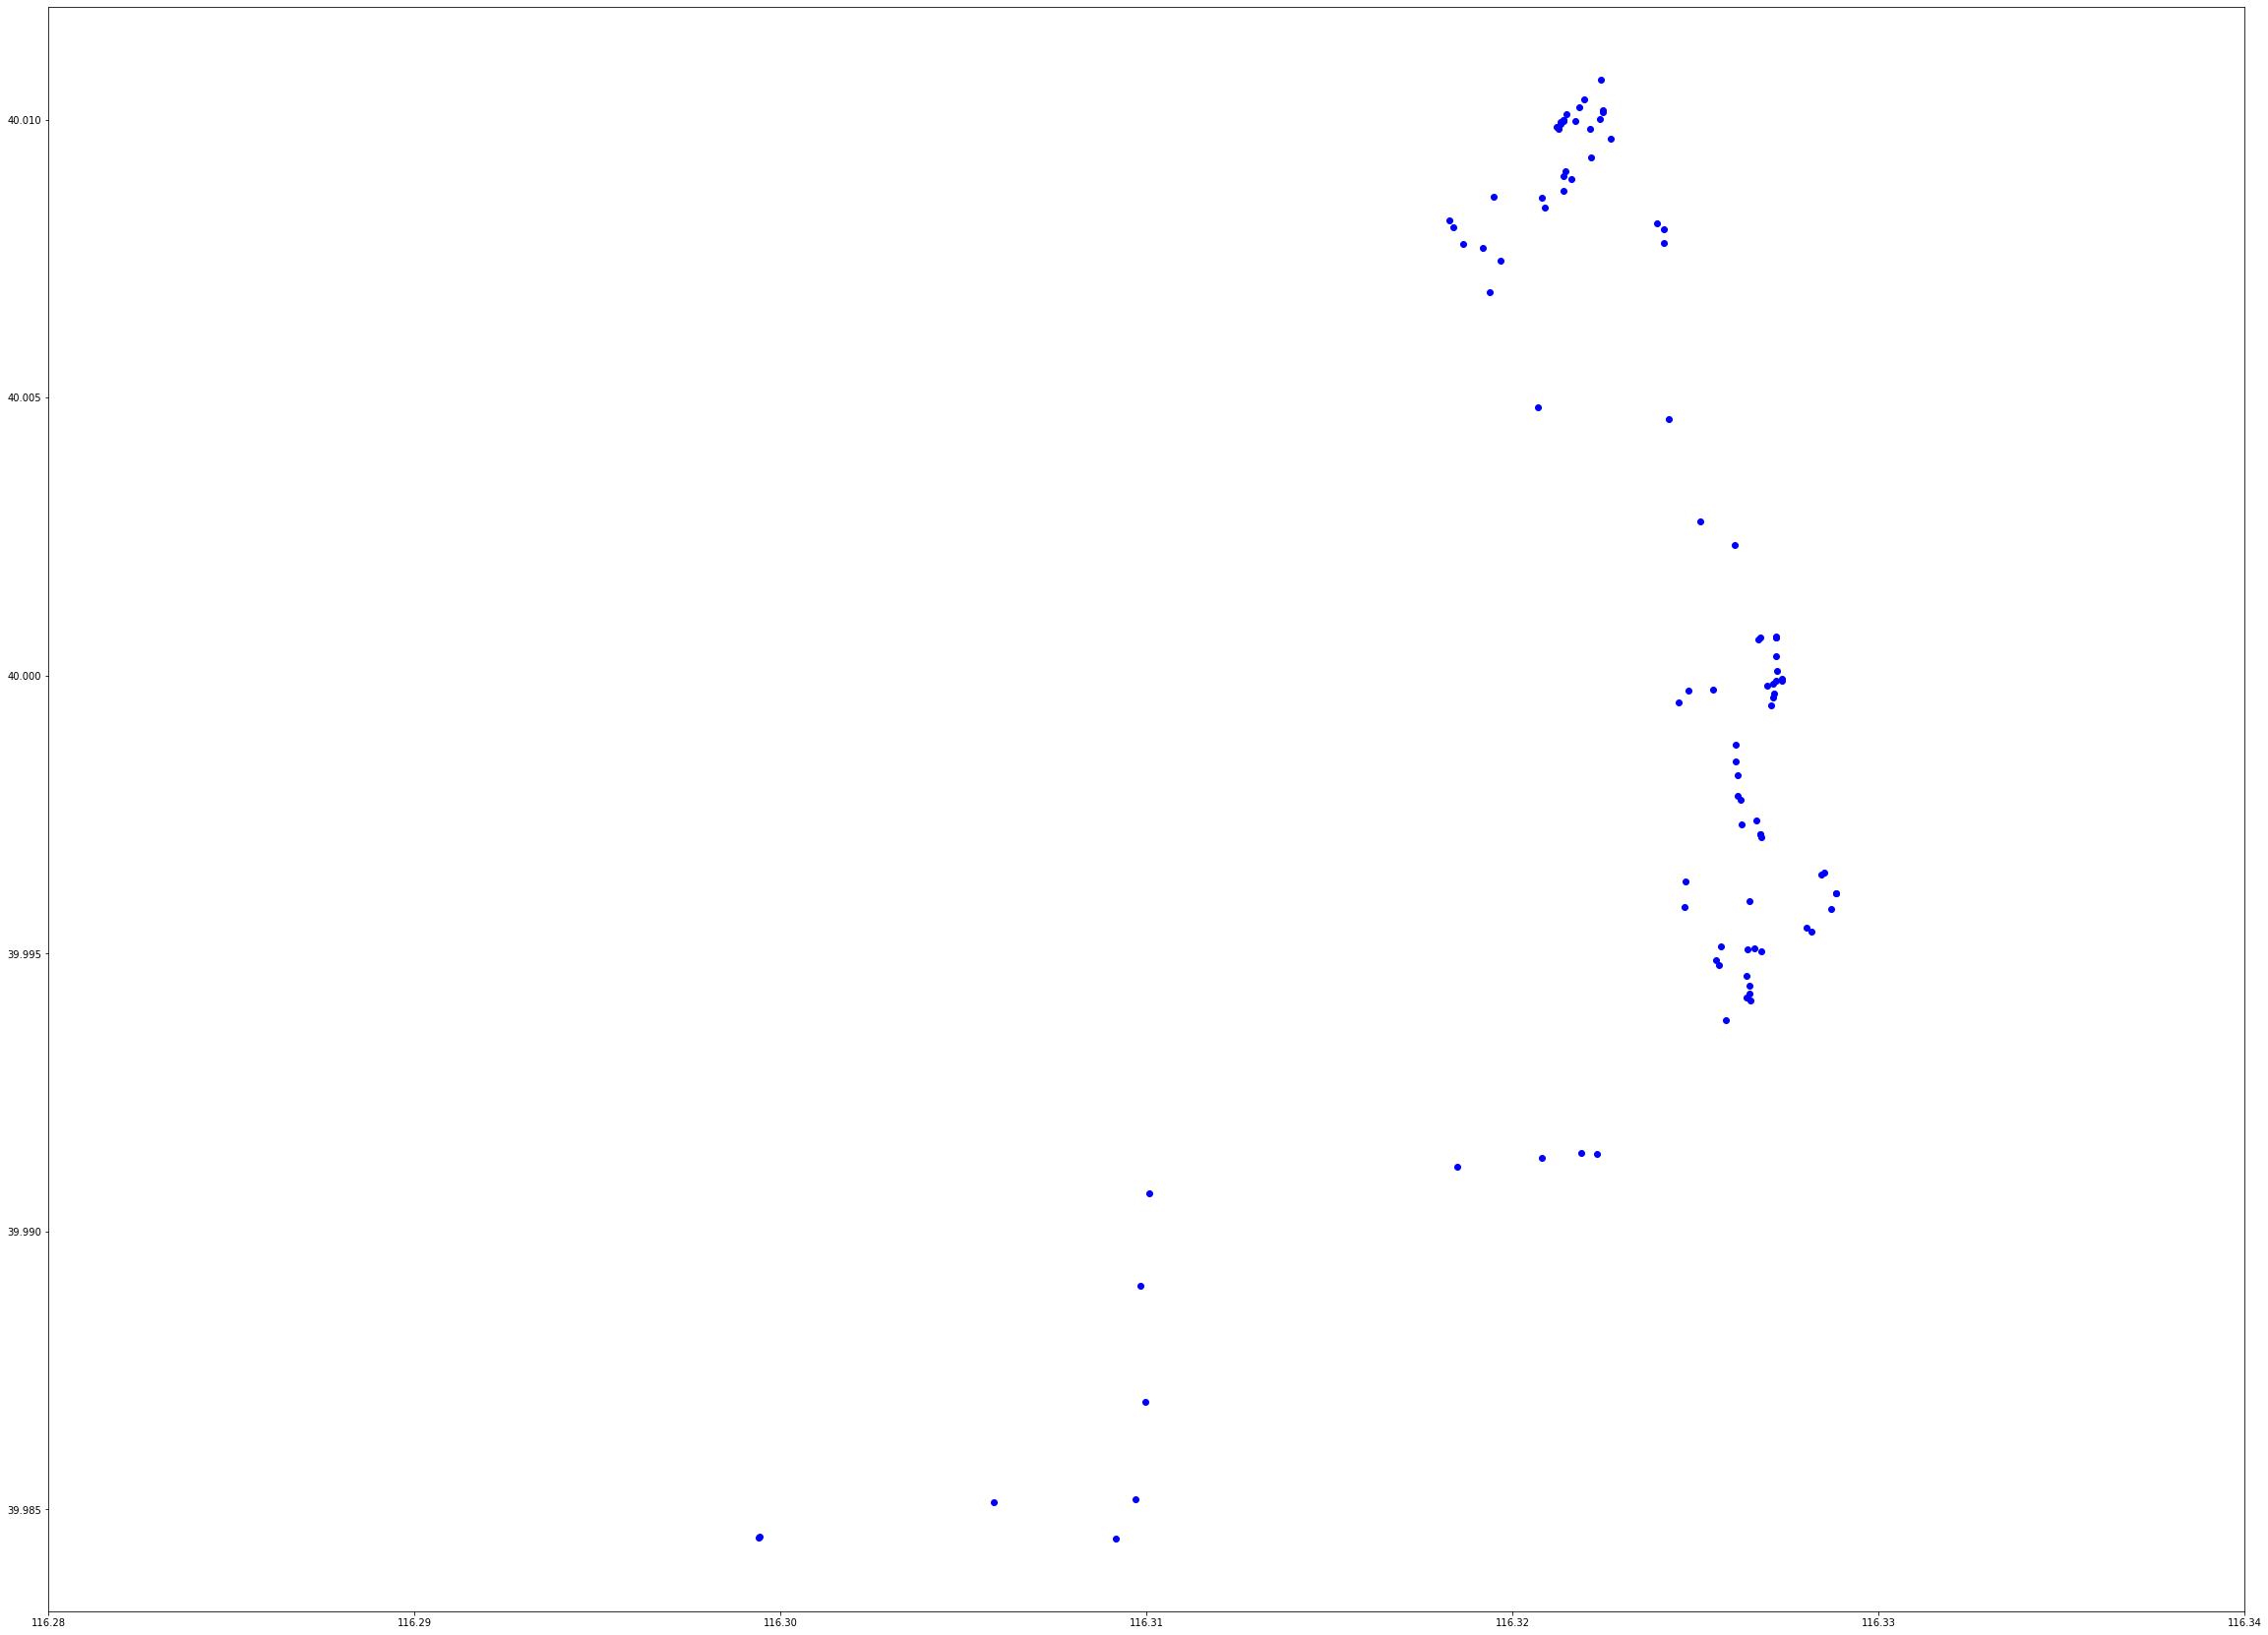

In [9]:
start=time()
rd_sample=ReservoirSample(point_set[:2000],sample_size)
print('running time: ',time()-start)
print('objective value: ',get_obj(rd_sample,prox))
# print(get_obj(rd_sample,sample_size))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.figure(figsize=(40,30))
# plot.xlim(116.29,116.81)
plot.xlim(116.28,116.34)
plot.scatter(rd_x,rd_y,c='b')
plot.show()

running time:  0.010022163391113281
objective value:  135.01


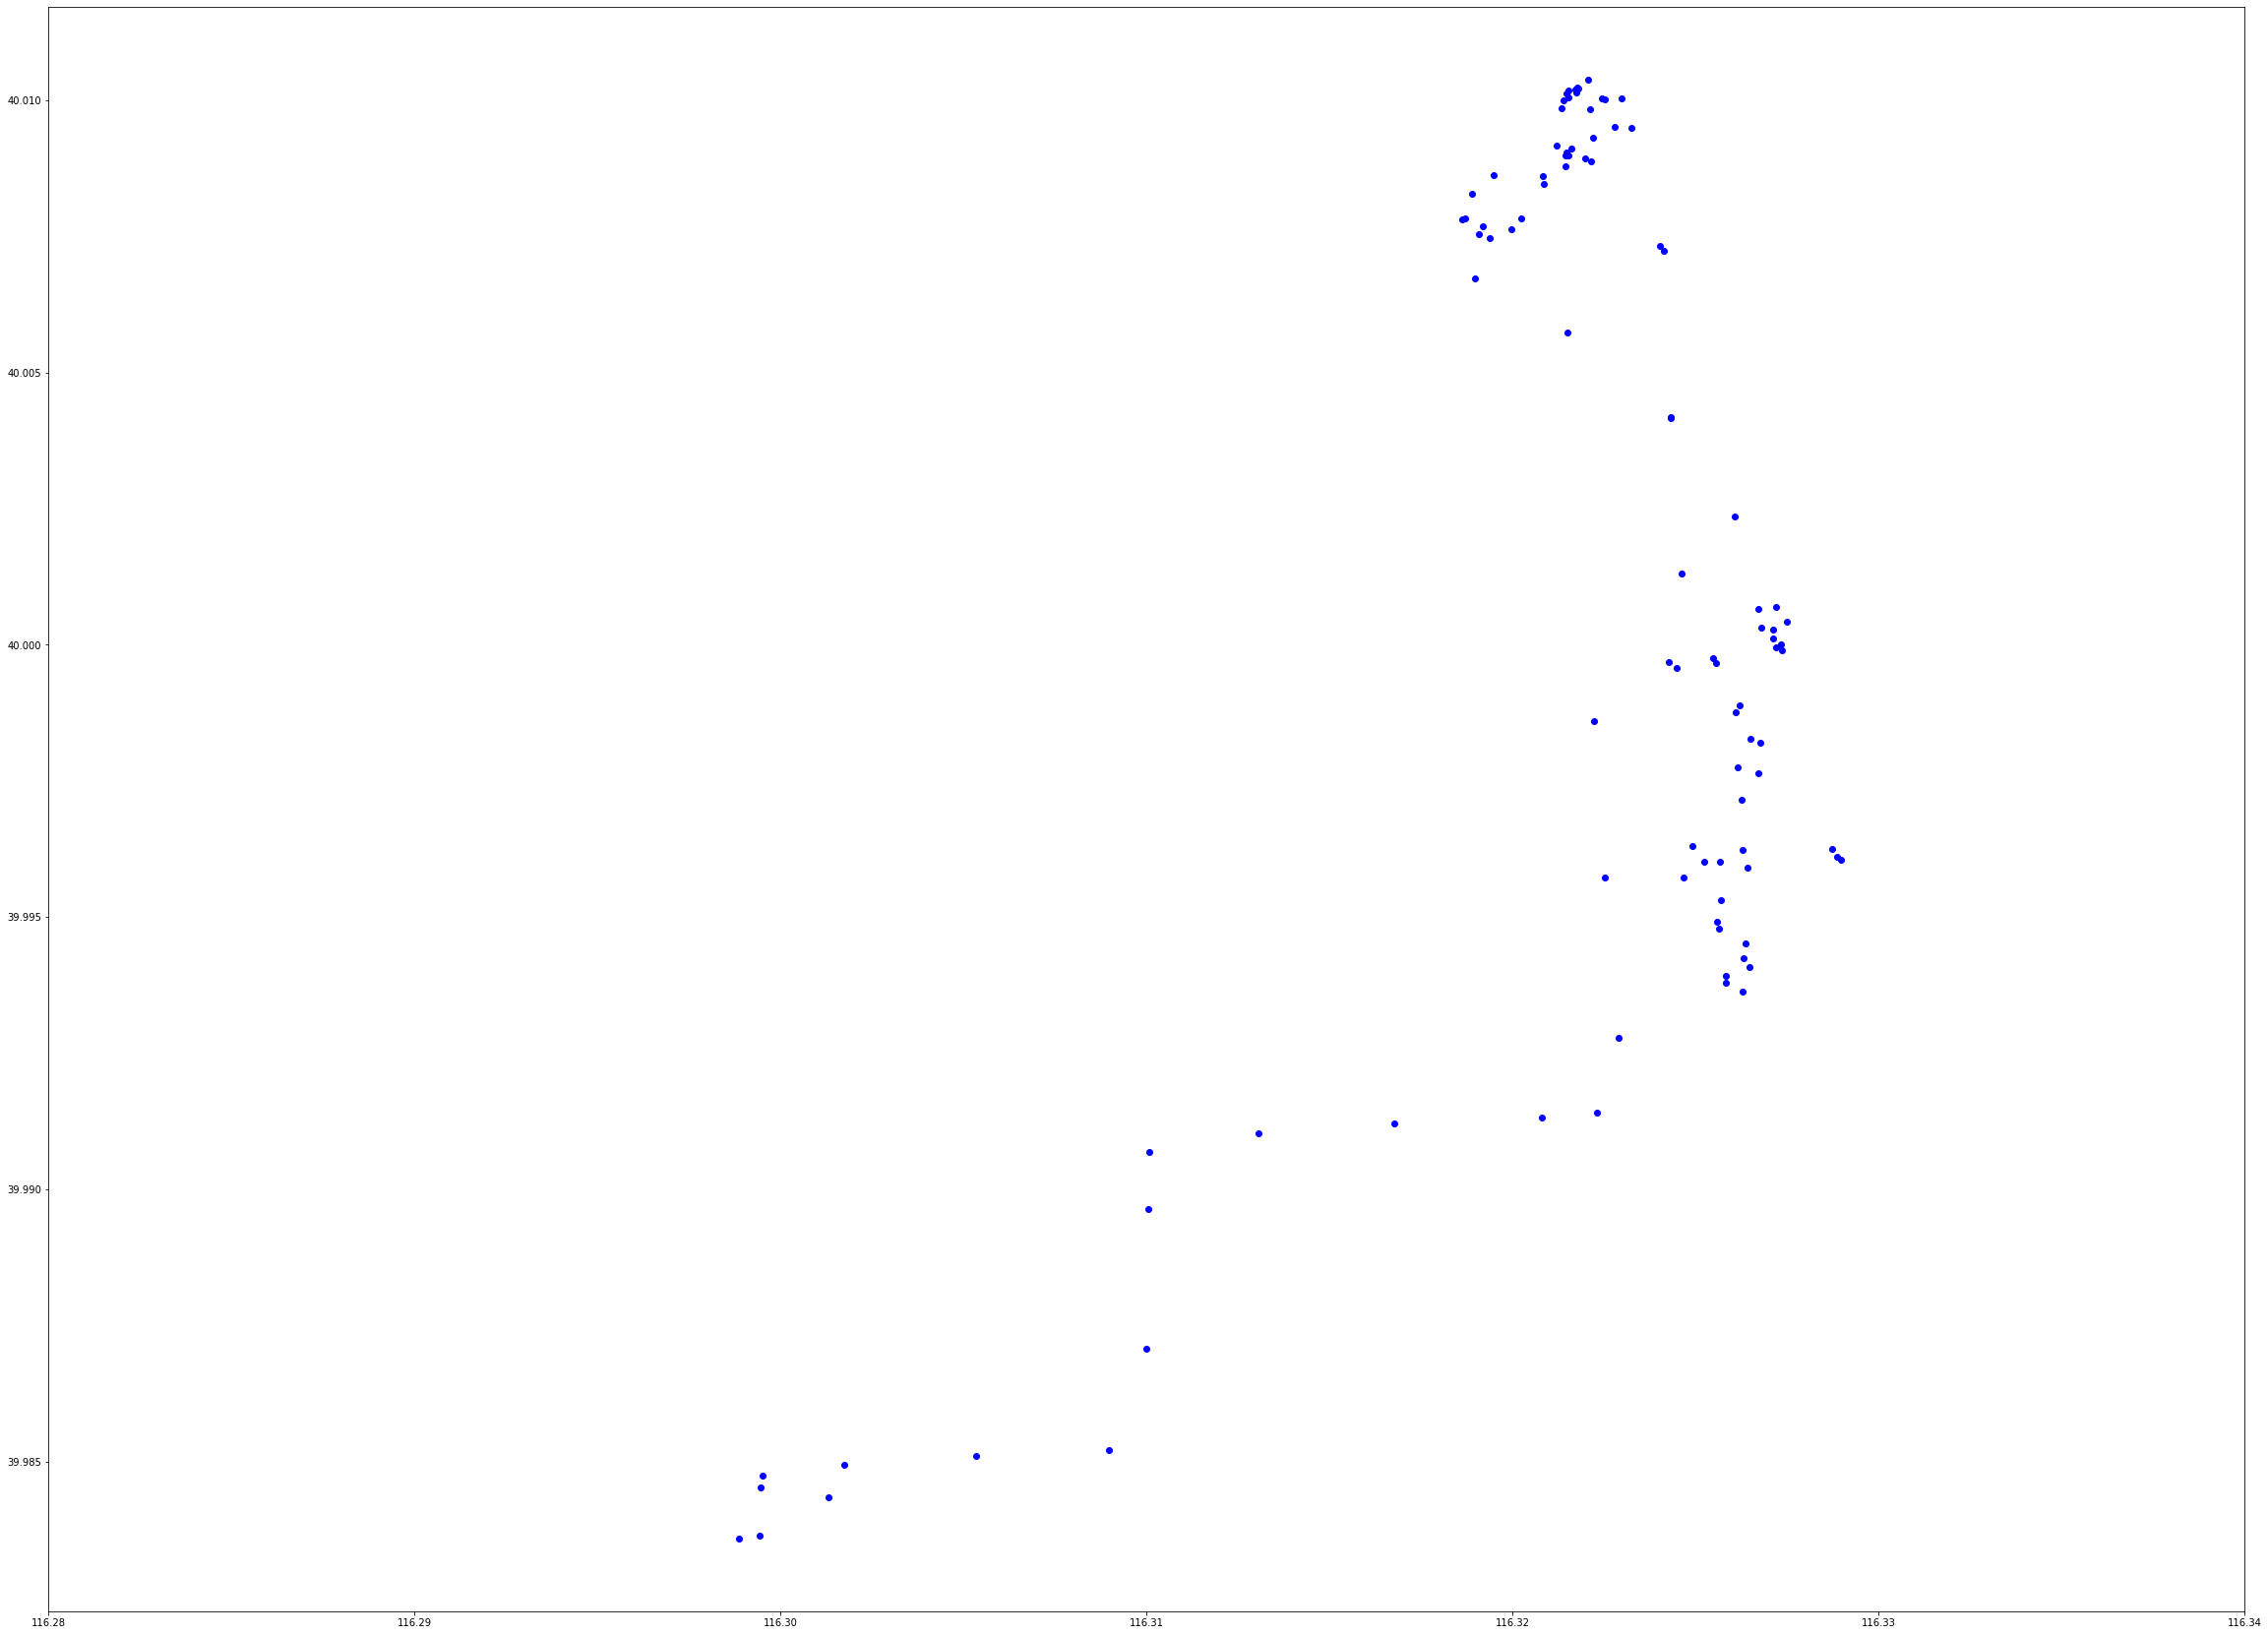

In [10]:
start=time()
st_sample=Stratified_sampling(point_set[:2000],sample_size,100)
print('running time: ',time()-start)
print("objective value: ",get_obj(st_sample,prox))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.figure(figsize=(40,30))
# plot.xlim(116.29,116.81)
plot.xlim(116.28,116.34)
plot.scatter(st_x,st_y,c='b')
plot.show()

# 10K files

In [4]:
int_generator=interchange_timer(prox)
int_samples=int_generator.run(point_set[:int(1e4)],500,3,3)
print(int_samples.shape)

10000
Sat Apr 16 13:54:59 2022
578 500
save 1th file
Sat Apr 16 13:55:02 2022
793 500
save 2th file
Sat Apr 16 13:55:05 2022
1017 500
save 3th file
(500, 2)


In [12]:
points=np.load('stop_points/int_10000_3_2_500.npy')
print(get_obj(points,prox),points.shape)

1790.87 (500, 2)


In [7]:
start=time()
st_sample=Stratified_sampling(point_set[:int(1e4)],500,100)
print('running time: ',time()-start)
print("objective value: ",get_obj(st_sample,prox))
# st_x=st_sample[:,0]
# st_y=st_sample[:,1]
# plot.figure(figsize=(40,30))
# # plot.xlim(116.29,116.81)
# plot.xlim(116.28,116.34)
# plot.scatter(st_x,st_y,c='b')
# plot.show()

running time:  0.02016282081604004
objective value:  3450.35


In [14]:
start=time()
rd_sample=ReservoirSample(point_set[:int(1e4)],500)
# print(get_obj(rd_sample,sample_size))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
print('running time: ',time()-start)
print("objective value: ",get_obj(rd_sample,prox))
# plot.figure(figsize=(40,30))
# plot.xlim(116.29,116.81)
# plot.scatter(rd_x,rd_y,c='b')
# plot.show()

running time:  0.02056121826171875
objective value:  4433.79


# 50 Files

In [4]:
prox.epsilon=3.2147064340016937e-07

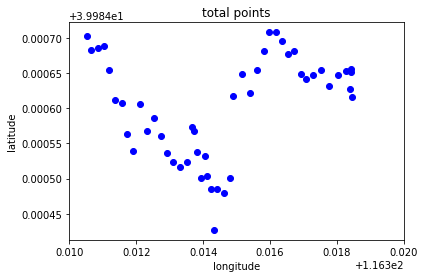

In [11]:
x=point_set[:49,0]
y=point_set[:49,1]

# plot.xlim(116.31,116)
# plot.figure(figsize=(20,10))
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('total points')
plot.xlim(116.31, 116.32)
plot.scatter(x,y,c='b')

In [7]:
x_cpy=deepcopy(x)
x_cpy[0],x_cpy[-1]

(116.310534, 116.31845)

running time:  0.01729583740234375
objective value:  1.95


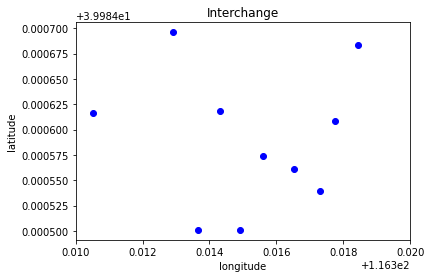

In [5]:

int_generator=interchange(prox)
start=time()
int_samples=int_generator.run(point_set[:49],10)
print('running time: ',time()-start)
print("objective value: ",get_obj(int_samples,prox))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Interchange')
plot.xlim(116.31, 116.32)
plot.scatter(int_x,int_y,c='b')


running time:  0.016123056411743164
objective value:  16.36


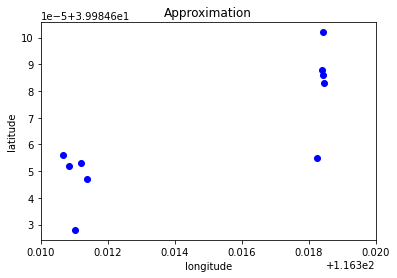

In [6]:
start=time()
get_adj_mat(point_set[:49],10,prox)
get_heaps()
subgraph=dense_k(10)
dk_samples=point_set[:49][list(subgraph)]
print('running time: ',time()-start)
print("objective value: ",get_obj(dk_samples,prox))
dk_x=dk_samples[:,0]
dk_y=dk_samples[:,1]
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Approximation')
plot.xlim(116.31, 116.32)
plot.scatter(dk_x,dk_y,c='b')

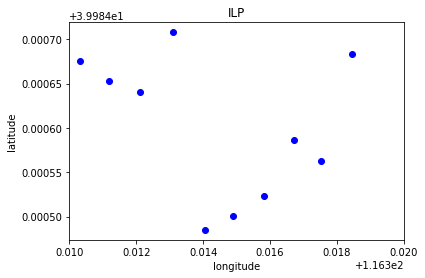

In [7]:
ilp_50=np.load('ilp_50.npy')[0] #ilp_50.shape=(1, 10, 2)
ilp_x=ilp_50[:,0]
ilp_y=ilp_50[:,1]
# plot.figure(figsize=(30,20))
# plot.xlim(116.28,116.34)

# plot.xlim(116.31,116)
# plot.figure(figsize=(20,10))
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('ILP')
plot.xlim(116.31, 116.32)
plot.scatter(ilp_x,ilp_y,c='b')

running time:  0.0008068084716796875
objective value:  5.04


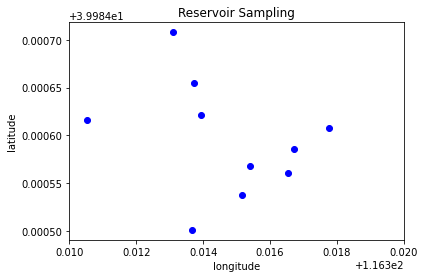

In [8]:
start=time()
rd_sample=ReservoirSample(point_set[:49],10)
print('running time: ',time()-start)
print("objective value: ",get_obj(rd_sample,prox))
# print(get_obj(rd_sample,prox))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.xlim(116.31, 116.32)
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Reservoir Sampling')
plot.scatter(rd_x,rd_y,c='b')

running time:  0.0020055770874023438
objective value:  6.14


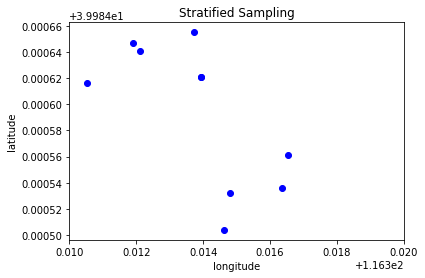

In [9]:
start=time()
st_sample=Stratified_sampling(point_set[:49],10,5)
print('running time: ',time()-start)
print("objective value: ",get_obj(st_sample,prox))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.xlim(116.31, 116.32)
plot.xlabel('longitude')
plot.ylabel('latitude')
plot.title('Stratified Sampling')
plot.scatter(st_x,st_y,c='b')